# LAB 03

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#To ignore all the warnings
import warnings
warnings.filterwarnings("ignore")

In [29]:
train_data = pd.read_csv('train.csv')
train_data.sample(5)

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
641,642,1,1,"Sagesser, Mlle. Emma",female,24.0,0,0,PC 17477,69.3000,B35,C
540,541,1,1,"Crosby, Miss. Harriet R",female,36.0,0,2,WE/P 5735,71.0000,B22,S
830,831,1,3,"Yasbeck, Mrs. Antoni (Selini Alexander)",female,15.0,1,0,2659,14.4542,NaN,C
837,838,0,3,"Sirota, Mr. Maurice",male,NaN,0,0,392092,8.0500,NaN,S
823,824,1,3,"Moor, Mrs. (Beila)",female,27.0,0,1,392096,12.4750,E121,S


In [10]:
train_data.set_index('PassengerID', inplace = True)
print(train_data['Pclass'])

PassengerId
1      3
2      1
3      3
4      1
5      3
      ..
887    2
888    1
889    3
890    1
891    3
Name: Pclass, Length: 891, dtype: int64


In [13]:
print(train_data['Survived'].value_counts())

Survived
0    549
1    342
Name: count, dtype: int64


In [14]:
print(train_data['Pclass'].value_counts())

Pclass
3    491
1    216
2    184
Name: count, dtype: int64


In [15]:
print(['Age', 'Fare'],": Numeric attributes")
print('Some values of age are:')
print(train_data['Age'][0:3])
print('Some values of Fare are:')
print(train_data['Fare'][0:3])

['Age', 'Fare'] : Numeric attributes
Some values of age are:
PassengerId
1    22.0
2    38.0
3    26.0
Name: Age, dtype: float64
Some values of Fare are:
PassengerId
1     7.2500
2    71.2833
3     7.9250
Name: Fare, dtype: float64


In [17]:
print(train_data['Pclass'].value_counts())

Pclass
3    491
1    216
2    184
Name: count, dtype: int64


In [27]:
print('Examples of continuous attributes')
print(train_data['Fare'][0:3])
print(train_data['Age'][0:3])
print('Examples of discrete attributes')
print(train_data['Pclass'][0:3])
print(train_data['SibSp'][0:3])
print(train_data['Survived'][0:3])

Examples of continuous attributes
PassengerId
1     7.2500
2    71.2833
3     7.9250
Name: Fare, dtype: float64
PassengerId
1    22.0
2    38.0
3    26.0
Name: Age, dtype: float64
Examples of discrete attributes
PassengerId
1    3
2    1
3    3
Name: Pclass, dtype: int64
PassengerId
1    1
2    1
3    0
Name: SibSp, dtype: int64
PassengerId
1    0
2    1
3    1
Name: Survived, dtype: int64


In [32]:
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Gender       891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [34]:
print(train_data.describe(include='all'))

        PassengerId    Survived      Pclass                 Name Gender  \
count    891.000000  891.000000  891.000000                  891    891   
unique          NaN         NaN         NaN                  891      2   
top             NaN         NaN         NaN  Dooley, Mr. Patrick   male   
freq            NaN         NaN         NaN                    1    577   
mean     446.000000    0.383838    2.308642                  NaN    NaN   
std      257.353842    0.486592    0.836071                  NaN    NaN   
min        1.000000    0.000000    1.000000                  NaN    NaN   
25%      223.500000    0.000000    2.000000                  NaN    NaN   
50%      446.000000    0.000000    3.000000                  NaN    NaN   
75%      668.500000    1.000000    3.000000                  NaN    NaN   
max      891.000000    1.000000    3.000000                  NaN    NaN   

               Age       SibSp       Parch  Ticket        Fare Cabin Embarked  
count   714.000000 

In [38]:
print(train_data.Cabin.describe())
print(train_data['Cabin'].unique())

count     204
unique    147
top        G6
freq        4
Name: Cabin, dtype: object
[nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6'
 'B82 B84' 'D17' 'A36' 'B102' 'B69' 'E49' 'C47'

In [40]:
print(train_data.Cabin.isnull().sum()/len(train_data)*100)  

77.10437710437711


In [42]:
train_data.Survived.skew()

np.float64(0.4785234382949897)

In [46]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Gender', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

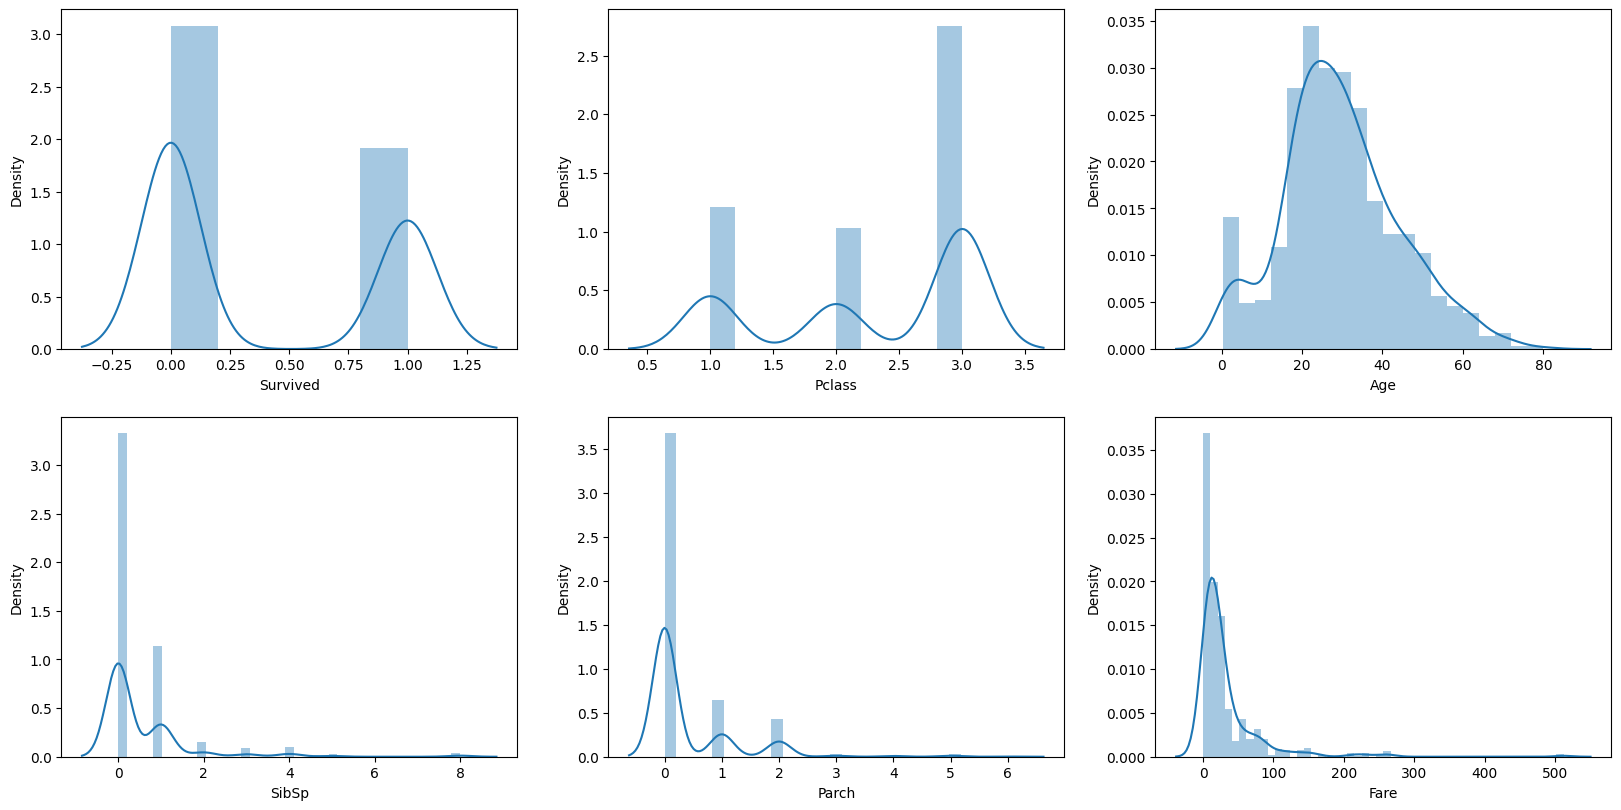

In [51]:
# Plot graphs show skewness of survived, Pclass, Age, SibSp, Parch, Fare
plt.figure(figsize=(20,15))
plt.subplot(3,3,1)
sns.distplot(train_data['Survived'])
plt.subplot(3,3,2)
sns.distplot(train_data['Pclass'])
plt.subplot(3,3,3)
sns.distplot(train_data['Age'])
plt.subplot(3,3,4)
sns.distplot(train_data['SibSp'])
plt.subplot(3,3,5)
sns.distplot(train_data['Parch'])
plt.subplot(3,3,6)
sns.distplot(train_data['Fare'])
plt.show()






# **22/10/2024**

In [5]:
# Hamming Distance
def hamming_distance(a,b):
    return sum(abs(e1-e2) for e1,e2 in zip(a,b))/len(a)

row1=[0,0,0,0,0,1]
row2=[0,0,0,0,1,0]

dist = hamming_distance(row1, row2)
print(dist)

0.3333333333333333


In [7]:
from scipy.spatial.distance import hamming
a = [0,0,0,1]
b = [1,0,1,1]
dist = hamming(a,b)
print(dist)

0.5


In [18]:
# distance

def calculate_distance(person1, person2):
    p = len(person1)
    m = 0
    
    for attr1, attr2 in zip(person1, person2):
        if attr1 == attr2:
            m = m+1
    
    distance = (p - m) / p
    return distance

ali = ['Blue', 'Cake']
bilal = ['Yellow', 'Cake']
faris = ['Yellow', 'Burger']

print('Distance between Ali and Bilal is:', calculate_distance(ali, bilal))
print('Distance between Ali and Faris is:', calculate_distance(ali, faris))

Distance between Ali and Bilal is: 0.5
Distance between Ali and Faris is: 1.0


In [16]:
# dissimilarities

def calculate_dissimilarity(person1, person2):
    r = s = q = 0 

    for attr1, attr2 in zip(person1, person2):
        if attr1 == "P" and attr2 == "N":
            r = r+1
        elif attr1 == "N" and attr2 == "P":
            s = s+1
        elif attr1 == attr2:
            q = q+1
    
    dissimilarity = (r + s) / (q + r + s)
    return dissimilarity

Jack = ['P', 'N', 'P', 'N', 'N', 'N']
Mary = ['P', 'N', 'P', 'N', 'P', 'N']
Jim = ['P', 'P', 'N', 'N', 'N', 'N']

# Calculate dissimilarities
dissimilarity_jack_mary = calculate_dissimilarity(Jack, Mary)
dissimilarity_jack_jim = calculate_dissimilarity(Jack, Jim)
dissimilarity_mary_jim = calculate_dissimilarity(Mary, Jim)

# Output the results
print(f"Dissimilarity between Jack and Mary: {dissimilarity_jack_mary}")
print(f"Dissimilarity between Jack and Jim: {dissimilarity_jack_jim}")
print(f"Dissimilarity between Mary and Jim: {dissimilarity_mary_jim}")

Dissimilarity between Jack and Mary: 0.16666666666666666
Dissimilarity between Jack and Jim: 0.3333333333333333
Dissimilarity between Mary and Jim: 0.5


# **29/10/2024**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Euclidean Distance
def euclidean_distance(x1,x2):
    return np.sqrt(sum((e1-e2)**2 for e1,e2 in zip(a,b)))
a = [0,3,4,5]
b = [7,6,3,-1]
print(euclidean_distance(a,b))


9.746794344808963


In [24]:
# Euclidean library define function
from scipy.spatial.distance import euclidean
dist = euclidean(a,b)
print(dist)

10.35615758860399


In [9]:
# Manhattan Distance
def manhattan_distance(x1,x2):
    return sum(abs(e1-e2) for e1,e2 in zip(a,b))
a = [0,3,4,5]
b = [7,6,3,-1]
print(manhattan_distance(a,b))

17


In [12]:
# Manhattan library define function
from scipy.spatial.distance import cityblock
dist = cityblock(a,b)
print(dist)

17


In [8]:
# Minkowski Distance 
p = int(input('Enter power:')) # if 1, it's manhattan; if 2, it's euclidean
def minkowski_distance(x1,x2,p):
    return sum(abs(e1-e2)**p for e1,e2 in zip(a,b))**(1/p)
a = [0,3,4,5]
b = [7,6,3,-1]
print(minkowski_distance(a,b,p))

17.0


In [12]:
# Minkowski library define function
from scipy.spatial.distance import minkowski
p = int(input('Enter power:'))
a = [0,3,4,5]
b = [7,6,3,-1]
print(minkowski_distance(a,b,p))

17.0


# **Lab Task**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import euclidean

Name = ['Ali', 'Bilal', 'Ehdsan', 'Faris'],
Age = [20, 25, 20, 20],
Salary = [34, 25, 25, 25],
Grade = ['C', 'B', 'C', 'A']

NGrade = [3, 2, 3, 1]

set(NGrade)
n = len(set(NGrade))
#print(n)

# Convert NGrade list into common range[0,1] formula is (rank-1)/(total_ranks-1)
NGrade = [(x-1)/(n-1) for x in NGrade]
print(NGrade)

# Calculate Euclidean distance between Ali and Bilal
Ali = [20, 34, NGrade[0]]
Bilal = [25, 25, NGrade[1]]
dist = euclidean(Ali, Bilal)
print(dist)

# Calculate supremum distance between Ali and Bilal
dist = max(abs(a-b) for a,b in zip(Ali, Bilal))
print(dist)

[1.0, 0.5, 1.0, 0.0]
10.307764064044152
9


# **12/11/2024**

In [1]:
import numpy as np
def cosine_similarity(x,y):
    if len(x) != len(y):
        return None

    dot_product = np.dot(x,y)

    IIxII =  np.sqrt(np.sum(x**2))
    IIyII =  np.sqrt(np.sum(y**2))

    cos_similarity_formula = dot_product / (IIxII * IIyII)
    return cos_similarity_formula

text1= ['Have you seen Harry Potter?',
        'Harry Potter is the best movie to exist',
        'Harry Potter is the best movie and I am the best person ever to exist']

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(text1).toarray()

print(X)

cos_sim_1_2 = cosine_similarity(X[0, :], X[1, :])
cos_sim_1_3 = cosine_similarity(X[0, :], X[2, :])
cos_sim_2_3 = cosine_similarity(X[1, :], X[2, :])
print('Cosine Similarity between: ')
print('\tDocument 1 and Document 2: ', cos_sim_1_2)
print('\tDocument 1 and Document 3: ', cos_sim_1_3)
print('\tDocument 2 and Document 3: ', cos_sim_2_3)

[[0 0 0 0 0 1 1 0 0 0 1 1 0 0 1]
 [0 0 1 0 1 1 0 1 1 0 1 0 1 1 0]
 [1 1 2 1 1 1 0 1 1 1 1 0 2 1 0]]
Cosine Similarity between: 
	Document 1 and Document 2:  0.31622776601683794
	Document 1 and Document 3:  0.21081851067789195
	Document 2 and Document 3:  0.8333333333333334


# **Lab task:**
Calulate cosine similarity of four paragraphs and also print out the count for each word in the paragraphs. for example : is appeared how many times in all three paragraphs?..e.t.c for each word

In [2]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

def cosine_similarity(x, y):
    if len(x) != len(y):
        return None

    dot_product = np.dot(x, y)

    IIxII = np.sqrt(np.sum(x**2))
    IIyII = np.sqrt(np.sum(y**2))

    cos_similarity_formula = dot_product / (IIxII * IIyII)
    return cos_similarity_formula

twitter = """
Twitter is an online social media and social networking service owned
and operated by American company X Corp.,
the legal successor of Twitter, Inc. Twitter users outside the United
States are legally served by the Ireland-based
Twitter International Unlimited Company, which makes these users
subject to Irish and European Union data protection laws.
On Twitter users post texts, photos and videos known as 'tweets'.
Registered users can tweet, like, 'retweet' tweets,
and direct message (DM) other registered users, while unregistered
users only have the ability to view public tweets.
Users interact with Twitter through browser or mobile frontend
software, or programmatically via its APIs.
"""

facebook = """
Facebook is an online social media and social networking service owned
by American technology giant Meta Platforms.
Created in 2004 by Mark Zuckerberg with fellow Harvard College
students and roommates Eduardo Saverin, Andrew McCollum,
Dustin Moskovitz, and Chris Hughes, its name derives from the face
book directories often given to American university students.
Membership was initially limited to only Harvard students, gradually
expanding to other North American universities and,
since 2006, anyone over 13 years old. As of December 2022, Facebook
claimed 2.96 billion monthly active users, and ranked third
worldwide among the most visited websites. It was the most downloaded
mobile app of the 2010s. Facebook can be accessed from devices
with Internet connectivity, such as personal computers, tablets and
smartphones. After registering, users can create a profile
revealing information about themselves. They can post text, photos and
multimedia which are shared with any other users who have
agreed to be their friend' or, with different privacy settings,
publicly. Users can also communicate directly with each other with
Messenger, join common-interest groups, and receive notifications on
the activities of their Facebook friends and the pages they follow.
"""

tiktok = """
TikTok, and its Chinese counterpart Douyin (Chinese: 抖音; pinyin:
Dǒuyīn), is a short-form video hosting service owned by ByteDance.
It hosts user-submitted videos, which can range in duration from 3
seconds to 10 minutes. Since their launches, TikTok and Douyin have
gained global popularity.[6][7] In October 2020, TikTok surpassed 2
billion mobile downloads worldwide. Morning Consult named TikTok the
third-fastest growing brand of 2020, after Zoom and Peacock.
Cloudflare ranked TikTok the most popular website of 2021,
surpassing google.com.
"""

instagram = """
Instagram is a photo and video sharing social networking service owned
by American company Meta Platforms. The app allows users to
upload media that can be edited with filters and organized by hashtags
and geographical tagging. Posts can be shared publicly or
with preapproved followers. Users can browse other users' content by
tag and location, view trending content, like photos, and follow
other users to add their content to a personal feed. Instagram was
originally distinguished by allowing content to be framed only in a
square (1:1) aspect ratio of 640 pixels to match the display width of
the iPhone at the time. In 2015, this restriction was eased with
an increase to 1080 pixels. It also added messaging features, the
ability to include multiple images or videos in a single post, and a
Stories feature—similar to its main competitor Snapchat—which allowed
users to post their content to a sequential feed, with each post
accessible to others for 24 hours. As of January 2019, Stories is used
by 500 million people daily.
"""

document = [twitter, facebook, tiktok, instagram]
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(document).toarray()

cos_sim_1_2 = cosine_similarity(X[0, :], X[1, :])
cos_sim_1_3 = cosine_similarity(X[0, :], X[2, :])
cos_sim_1_4 = cosine_similarity(X[0, :], X[3, :])
cos_sim_2_3 = cosine_similarity(X[1, :], X[2, :])
cos_sim_2_4 = cosine_similarity(X[1, :], X[3, :])
cos_sim_3_4 = cosine_similarity(X[2, :], X[3, :])

print('\nCosine Similarity between:')
print(f'\tDocument 1 (Twitter) and Document 2 (Facebook): {cos_sim_1_2}')
print(f'\tDocument 1 (Twitter) and Document 3 (TikTok): {cos_sim_1_3}')
print(f'\tDocument 1 (Twitter) and Document 4 (Instagram): {cos_sim_1_4}')
print(f'\tDocument 2 (Facebook) and Document 3 (TikTok): {cos_sim_2_3}')
print(f'\tDocument 2 (Facebook) and Document 4 (Instagram): {cos_sim_2_4}')
print(f'\tDocument 3 (TikTok) and Document 4 (Instagram): {cos_sim_3_4}')

word_counts = pd.DataFrame(X, columns=vectorizer.get_feature_names_out())
print(word_counts)


Cosine Similarity between:
	Document 1 (Twitter) and Document 2 (Facebook): 0.49812777753930826
	Document 1 (Twitter) and Document 3 (TikTok): 0.2326957082444114
	Document 1 (Twitter) and Document 4 (Instagram): 0.4939598741083312
	Document 2 (Facebook) and Document 3 (TikTok): 0.34922161264379814
	Document 2 (Facebook) and Document 4 (Instagram): 0.6035279596937492
	Document 3 (TikTok) and Document 4 (Instagram): 0.30479179723505573
   10  1080  13  2004  2006  2010s  2015  2019  2020  2021  ...  which  while  \
0   0     0   0     0     0      0     0     0     0     0  ...      1      1   
1   0     0   1     1     1      1     0     0     0     0  ...      1      0   
2   1     0   0     0     0      0     0     0     2     1  ...      1      0   
3   0     1   0     0     0      0     1     1     0     0  ...      1      0   

   who  width  with  worldwide  years  zoom  zuckerberg  抖音  
0    0      0     1          0      0     0           0   0  
1    1      0     6          1 

# **Applying Preprocessing on Titanic Dataset:**

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#to ignore warnings:

import warnings
warnings.filterwarnings('ignore')

train_data = pd.read_csv('train.csv')
train_data.sample(5)

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
424,425,0,3,"Rosblom, Mr. Viktor Richard",male,18.0,1,1,370129,20.2125,NaN,S
566,567,0,3,"Stoytcheff, Mr. Ilia",male,19.0,0,0,349205,7.8958,NaN,S
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
170,171,0,1,"Van der hoef, Mr. Wyckoff",male,61.0,0,0,111240,33.5000,B19,S
124,125,0,1,"White, Mr. Percival Wayland",male,54.0,0,1,35281,77.2875,D26,S


In [17]:
train_data.set_index('PassengerId', inplace=True)
train_data.sample(5)

,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
274,0,1,"Natsch, Mr. Charles H",male,37.0,0,1,PC 17596,29.7000,C118,C
486,0,3,"Lefebre, Miss. Jeannie",female,NaN,3,1,4133,25.4667,NaN,S
436,1,1,"Carter, Miss. Lucile Polk",female,14.0,1,2,113760,120.0000,B96 B98,S
72,0,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.9000,NaN,S
615,0,3,"Brocklebank, Mr. William Alfred",male,35.0,0,0,364512,8.0500,NaN,S


# **19/11/2024**

**Missing values treatment:**
1.   Default value
2.   Deleting a row or column
3.   Mean/median/mode - imputation: generally mean but if outliers than median and if categorical columns then mode

In [18]:
# First step is to see how many missing values are in each column:

def calc_missing_values(df):
  missing_count = df.isnull().sum().sort_values(ascending=False)
  missing_percent = round(missing_count / len(df) * 100, 2)
  missing_values = pd.concat([missing_count, missing_percent], axis=1, keys=['Count', 'Percent'])
  return missing_values

calc_missing_values(train_data)

,Count,Percent
Cabin,687,77.10
Age,177,19.87
Embarked,2,0.22
Name,0,0.00
Pclass,0,0.00
Survived,0,0.00
Gender,0,0.00
Parch,0,0.00
SibSp,0,0.00
Fare,0,0.00


In [56]:
print('Mean age of passengers:', train_data.Age.mean())
print('Median age of passengers:', train_data.Age.median())

Mean age of passengers: 29.69911764705882
Median age of passengers: 29.69911764705882


In [57]:
train_data.Age.fillna(train_data.Age.mean(), inplace=True)

In [ ]:
print('Mode of Embarked is:', train_data.Embarked.mode().values[0])

Mode of Embarked is: S


In [ ]:
train_data.Embarked.fillna(train_data.Embarked.mode().values[0], inplace=True)

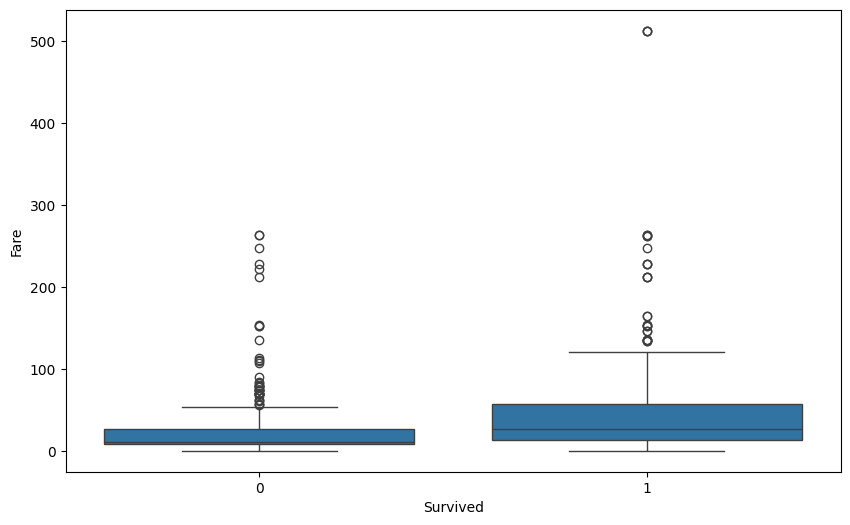

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
box_plot = sns.boxplot(x=train_data.Survived, y=train_data.Fare, data=train_data)

In [61]:
train_data[train_data.Fare > 300]

,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


In [62]:
columns_to_drop = ['Name', 'Ticket', 'Cabin']
train_data.drop(columns=columns_to_drop, axis=1, inplace=True)

In [63]:
train_data.head()

,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


In [64]:
train_data = pd.get_dummies(train_data, columns=['Gender', 'Embarked'], drop_first=True)

In [65]:
train_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Gender_male,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,
1,0,3,22.0,1,0,7.2500,True,False,True
2,1,1,38.0,1,0,71.2833,False,False,False
3,1,3,26.0,0,0,7.9250,False,False,True
4,1,1,35.0,1,0,53.1000,False,False,True
5,0,3,35.0,0,0,8.0500,True,False,True


# **Lab Task**

In [66]:
def Bucketize_Age(age):
    if age <= 12:
        return 0
    elif age <= 19:
        return 1
    elif age <= 59:
        return 2
    else:
        return 3
train_data['Age'] = train_data['Age'].apply(Bucketize_Age)
print(train_data.head())

             Survived  Pclass  Age  SibSp  Parch     Fare  Gender_male  \
PassengerId                                                              
1                   0       3    2      1      0   7.2500         True   
2                   1       1    2      1      0  71.2833        False   
3                   1       3    2      0      0   7.9250        False   
4                   1       1    2      1      0  53.1000        False   
5                   0       3    2      0      0   8.0500         True   

             Embarked_Q  Embarked_S  
PassengerId                          
1                 False        True  
2                 False       False  
3                 False        True  
4                 False        True  
5                 False        True  


In [67]:
print(train_data)

             Survived  Pclass  Age  SibSp  Parch     Fare  Gender_male  \
PassengerId                                                              
1                   0       3    2      1      0   7.2500         True   
2                   1       1    2      1      0  71.2833        False   
3                   1       3    2      0      0   7.9250        False   
4                   1       1    2      1      0  53.1000        False   
5                   0       3    2      0      0   8.0500         True   
...               ...     ...  ...    ...    ...      ...          ...   
887                 0       2    2      0      0  13.0000         True   
888                 1       1    1      0      0  30.0000        False   
889                 0       3    2      1      2  23.4500        False   
890                 1       1    2      0      0  30.0000         True   
891                 0       3    2      0      0   7.7500         True   

             Embarked_Q  Embarked_S  

In [68]:
#Now replace true and false with 1 and 0
train_data['Gender_male'] = train_data['Gender_male'].apply(lambda x: 1 if x == True else 0)
train_data['Embarked_Q'] = train_data['Embarked_Q'].apply(lambda x: 1 if x == True else 0)
train_data['Embarked_S'] = train_data['Embarked_S'].apply(lambda x: 1 if x == True else 0)

In [69]:
train_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Gender_male,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,
1,0,3,2,1,0,7.2500,1,0,1
2,1,1,2,1,0,71.2833,0,0,0
3,1,3,2,0,0,7.9250,0,0,1
4,1,1,2,1,0,53.1000,0,0,1
5,0,3,2,0,0,8.0500,1,0,1


In [70]:
first_quartile_fare = train_data.Fare.quantile(0.25)
second_quartile_fare = train_data.Fare.quantile(0.50)
third_quartile_fare = train_data.Fare.quantile(0.75)
def fare_bucketizer(r):
    if r <= first_quartile_fare:
        return 0
    elif r <= second_quartile_fare:
        return 1
    elif r <= third_quartile_fare:
        return 2
    else:
        return 3
train_data['Fare'] = train_data['Fare'].apply(fare_bucketizer)

In [71]:
train_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Gender_male,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,
1,0,3,2,1,0,0,1,0,1
2,1,1,2,1,0,3,0,0,0
3,1,3,2,0,0,1,0,0,1
4,1,1,2,1,0,3,0,0,1
5,0,3,2,0,0,1,1,0,1


In [72]:
train_data.to_csv('train_cleaned_data.csv')

# **Lab Assignment # 02**

# **Applying Preprocessing on Sales missing dataset:**

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#to ignore warnings:

import warnings
warnings.filterwarnings('ignore')

sd = pd.read_csv('sales_data_missing.csv')
sd.sample(5)

,store_id,customer_id,product_id,product_category,date,amount,single_price,transaction_id
3,Store 05,Customer 1988,85359,Books,5/7/2005 13:19,5.0,16.962671,4
95,Store 10,Customer 711,86284,Toys,5/23/2005 16:11,8.0,93.641214,96
27,Store 05,Customer 1587,21123,Movies,10/10/2005 20:19,9.0,75.655959,28
39,Store 15,Customer 1973,93494,Movies,12/30/2005 0:07,5.0,34.523620,40
54,Store 01,Customer 296,93469,Toys,11/15/2006 7:44,5.0,35.760683,55


In [103]:
sd.columns

Index(['store_id', 'customer_id', 'product_id', 'product_category', 'date',
       'amount', 'single_price', 'transaction_id'],
      dtype='object')

In [104]:
sd.set_index('transaction_id', inplace=True)
sd.head()

,store_id,customer_id,product_id,product_category,date,amount,single_price
transaction_id,,,,,,,
1,Store 01,Customer 1508,53642,Toys,4/1/2007 8:09,3.0,90.246230
2,Store 15,Customer 169,90945,Movies,2/15/2005 10:47,2.0,60.586312
3,Store 12,Customer 124,18548,Movies,9/27/2007 5:38,5.0,96.612695
4,Store 05,Customer 1988,85359,Books,5/7/2005 13:19,5.0,16.962671
5,Store 01,Customer 475,80069,Clothing,1/6/2008 17:36,5.0,65.215310


In [105]:
def calc_missing_values(df):
    missing_count = df.isnull().sum().sort_values(ascending=False)
    missing_percent = round(missing_count / len(df) * 100, 2)
    missing_values = pd.concat([missing_count, missing_percent], axis=1, keys=['Count', 'Percent'])
    return missing_values

print(calc_missing_values(sd))

                  Count  Percent
product_category      6      6.0
amount                6      6.0
store_id              0      0.0
product_id            0      0.0
customer_id           0      0.0
date                  0      0.0
single_price          0      0.0


In [106]:
sd['amount'].fillna(sd['amount'].mean(), inplace=True)

In [107]:
sd['product_category'].fillna(sd['product_category'].mode()[0], inplace=True)

In [108]:
from sklearn.preprocessing import LabelEncoder

store_encoder = LabelEncoder()
sd['store_id'] = store_encoder.fit_transform(sd['store_id'])

In [109]:
customer_encoder = LabelEncoder()
sd['customer_id'] = customer_encoder.fit_transform(sd['customer_id'])

In [110]:
sd.head()

,store_id,customer_id,product_id,product_category,date,amount,single_price
transaction_id,,,,,,,
1,0,25,53642,Toys,4/1/2007 8:09,3.0,90.246230
2,14,41,90945,Movies,2/15/2005 10:47,2.0,60.586312
3,11,8,18548,Movies,9/27/2007 5:38,5.0,96.612695
4,4,57,85359,Books,5/7/2005 13:19,5.0,16.962671
5,0,68,80069,Clothing,1/6/2008 17:36,5.0,65.215310


In [111]:
sd.drop(columns='date', axis=1, inplace=True)

In [112]:
sd = pd.get_dummies(sd, columns=['product_category'], drop_first=True)

In [113]:
first_quartile_amount = sd['amount'].quantile(0.25)
second_quartile_amount = sd['amount'].quantile(0.50)
third_quartile_amount = sd['amount'].quantile(0.75)

In [53]:
def amount_bucketizer(amount):
    if amount <= first_quartile_amount:
        return 0
    elif amount <= second_quartile_amount:
        return 1
    elif amount <= third_quartile_amount:
        return 2
    else:
        return 3

sd['amount'] = sd['amount'].apply(amount_bucketizer)

In [54]:
first_quartile_price = sd['single_price'].quantile(0.25)
second_quartile_price = sd['single_price'].quantile(0.50)
third_quartile_price = sd['single_price'].quantile(0.75)

In [55]:
def price_bucketizer(price):
    if price <= first_quartile_price:
        return 0
    elif price <= second_quartile_price:
        return 1
    elif price <= third_quartile_price:
        return 2
    else:
        return 3

sd['single_price'] = sd['single_price'].apply(price_bucketizer)

In [56]:
sd['product_category_Clothing'] = sd['product_category_Clothing'].apply(lambda x: 1 if x == True else 0)
sd['product_category_Electronics'] = sd['product_category_Electronics'].apply(lambda x: 1 if x == True else 0)
sd['product_category_Health'] = sd['product_category_Health'].apply(lambda x: 1 if x == True else 0)
sd['product_category_Home/Garden'] = sd['product_category_Home/Garden'].apply(lambda x: 1 if x == True else 0)
sd['product_category_Movies'] = sd['product_category_Movies'].apply(lambda x: 1 if x == True else 0)
sd['product_category_Sports'] = sd['product_category_Sports'].apply(lambda x: 1 if x == True else 0)
sd['product_category_Toys'] = sd['product_category_Toys'].apply(lambda x: 1 if x == True else 0)

In [57]:
sd.head()

,store_id,customer_id,product_id,amount,single_price,product_category_Clothing,product_category_Electronics,product_category_Health,product_category_Home/Garden,product_category_Movies,product_category_Sports,product_category_Toys
transaction_id,,,,,,,,,,,,
1,0,25,53642,0,3,0,0,0,0,0,0,1
2,14,41,90945,0,2,0,0,0,0,1,0,0
3,11,8,18548,2,3,0,0,0,0,1,0,0
4,4,57,85359,2,0,0,0,0,0,0,0,0
5,0,68,80069,2,2,1,0,0,0,0,0,0


In [58]:
sd.to_csv('sales_data_cleaned.csv')

In [59]:
scd = pd.read_csv('sales_data_cleaned.csv')
scd.sample(20)

,transaction_id,store_id,customer_id,product_id,amount,single_price,product_category_Clothing,product_category_Electronics,product_category_Health,product_category_Home/Garden,product_category_Movies,product_category_Sports,product_category_Toys
5,6,10,83,55848,0,2,0,0,0,0,0,1,0
51,52,9,50,54999,0,1,0,1,0,0,0,0,0
41,42,3,18,87586,0,1,0,0,0,0,0,0,0
92,93,3,6,83854,2,3,0,0,0,0,0,1,0
16,17,5,46,49126,1,1,0,1,0,0,0,0,0
14,15,0,4,90837,3,1,0,0,0,1,0,0,0
25,26,13,65,21470,1,0,0,0,0,0,0,0,0
97,98,13,58,47830,0,1,0,1,0,0,0,0,0
77,78,0,94,44627,0,3,0,0,0,0,0,0,0
60,61,11,77,99645,3,1,0,0,0,0,0,0,0


In [60]:
def calc_missing_values(df):
    missing_count = df.isnull().sum().sort_values(ascending=False)
    missing_percent = round(missing_count / len(df) * 100, 2)
    missing_values = pd.concat([missing_count, missing_percent], axis=1, keys=['Count', 'Percent'])
    return missing_values

print(calc_missing_values(scd))

                              Count  Percent
transaction_id                    0      0.0
store_id                          0      0.0
customer_id                       0      0.0
product_id                        0      0.0
amount                            0      0.0
single_price                      0      0.0
product_category_Clothing         0      0.0
product_category_Electronics      0      0.0
product_category_Health           0      0.0
product_category_Home/Garden      0      0.0
product_category_Movies           0      0.0
product_category_Sports           0      0.0
product_category_Toys             0      0.0


# **26/11/2024**

# **Lab Task**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('sales_data.csv')

In [4]:
def calc_missing_values(df):
    missing_count = df.isnull().sum().sort_values(ascending=False)
    missing_percent = round(missing_count / len(df) * 100, 2)
    missing_values = pd.concat([missing_count, missing_percent], axis=1, keys=['Count', 'Percent'])
    return missing_values

print(calc_missing_values(data)) 

                  Count  Percent
store_id              0      0.0
customer_id           0      0.0
product_id            0      0.0
product_category      0      0.0
date                  0      0.0
amount                0      0.0
single_price          0      0.0
transaction_id        0      0.0


In [5]:
data.head()

,store_id,customer_id,product_id,product_category,date,amount,single_price,transaction_id
0,Store 01,Customer 1508,53642,Toys,4/1/2007 8:09,3,90.246230,1
1,Store 15,Customer 169,90945,Movies,2/15/2005 10:47,2,60.586312,2
2,Store 12,Customer 124,18548,Movies,9/27/2007 5:38,5,96.612695,3
3,Store 05,Customer 1988,85359,Books,5/7/2005 13:19,5,16.962671,4
4,Store 01,Customer 475,80069,Clothing,1/6/2008 17:36,5,65.215310,5


In [6]:
# Aggregate the data
# Group by 'store_id' and 'product_category' and sum the 'amount'
grouped = data.groupby(['store_id', 'product_category'])['amount'].sum().reset_index()

In [7]:
# Assign x and y coordinates for the cubes
stores = grouped['store_id'].unique()
categories = grouped['product_category'].unique()

In [8]:
store_dict = {store: i for i, store in enumerate(stores)}
category_dict = {cat: i for i, cat in enumerate(categories)}

In [12]:
grouped['x'] = grouped['product_category'].map(category_dict)
grouped['y'] = grouped['store_id'].map(store_dict)
grouped['z'] = grouped['amount']

In [13]:
max_amount = data['amount'].max()
print(max_amount)

9


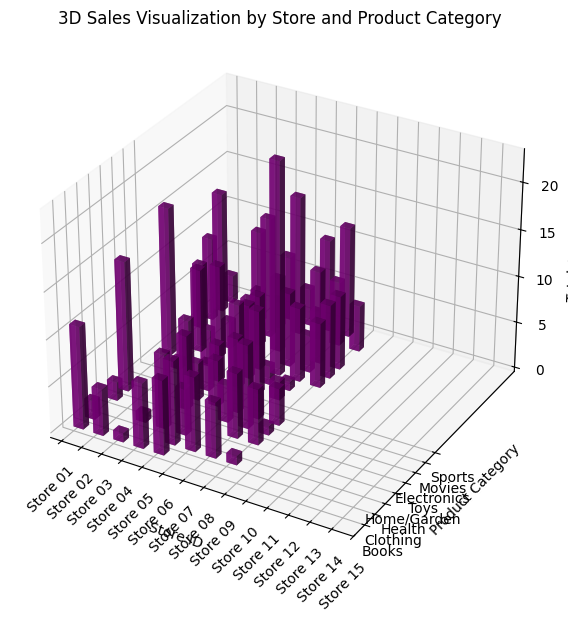

In [14]:
# Plot the 3D visualization
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Add cubes to the plot
for _, row in grouped.iterrows():
    ax.bar3d(
        row['x'], row['y'], 0,  # x, y, z coordinates
        dx=0.5, dy=0.5, dz=row['z'],  # dimensions
        color='purple', alpha=0.7
    )

# Customize the plot
ax.set_xticks(range(len(stores)))
ax.set_xticklabels(stores, rotation=45)
ax.set_yticks(range(len(categories)))
ax.set_yticklabels(categories)
ax.set_zlabel("Total Amount")

ax.set_xlabel("Store ID")
ax.set_ylabel("Product Category")
ax.set_title("3D Sales Visualization by Store and Product Category")

plt.show()

In [71]:
#total number of books sold at store 1
store1 = data[data['store_id'] == 'Store 01']   
store1_books = store1[store1['product_category'] == 'Books']
store1_books_total = store1_books['amount'].sum()
print(store1_books_total)

11


# **03/12/2024**



## **Lab Quiz**

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

test_data = pd.read_csv('test_Titanic.csv')
test_data.sample(5)

,PassengerId,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
164,1056,2,"Peruschitz, Rev. Joseph Maria",male,41.00,0,0,237393,13.0000,NaN,S
411,1303,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.00,1,0,19928,90.0000,C78,Q
281,1173,3,"Peacock, Master. Alfred Edward",male,0.75,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S
402,1294,1,"Gibson, Miss. Dorothy Winifred",female,22.00,0,1,112378,59.4000,NaN,C
161,1053,3,"Touma, Master. Georges Youssef",male,7.00,1,1,2650,15.2458,NaN,C


In [73]:
test_data.set_index('PassengerId', inplace=True)
test_data.sample(5)

,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
978,3,"Barry, Miss. Julia",female,27.0,0,0,330844,7.8792,NaN,Q
1069,1,"Stengel, Mr. Charles Emil Henry",male,54.0,1,0,11778,55.4417,C116,C
974,1,"Case, Mr. Howard Brown",male,49.0,0,0,19924,26.0000,NaN,S
1294,1,"Gibson, Miss. Dorothy Winifred",female,22.0,0,1,112378,59.4000,NaN,C
988,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",female,76.0,1,0,19877,78.8500,C46,S


In [74]:
def calc_missing_values(df):
  missing_count = df.isnull().sum().sort_values(ascending=False)
  missing_percent = round(missing_count / len(df) * 100, 2)
  missing_values = pd.concat([missing_count, missing_percent], axis=1, keys=['Count', 'Percent'])
  return missing_values

calc_missing_values(test_data)

,Count,Percent
Cabin,327,78.23
Age,86,20.57
Fare,1,0.24
Pclass,0,0.00
Name,0,0.00
Gender,0,0.00
Parch,0,0.00
SibSp,0,0.00
Ticket,0,0.00
Embarked,0,0.00


In [75]:
print('Mean age of passengers:', test_data.Age.mean())
print('Median age of passengers:', test_data.Age.median())

Mean age of passengers: 30.272590361445783
Median age of passengers: 27.0


In [76]:
test_data.Age.fillna(test_data.Age.mean(), inplace=True)

In [77]:
print('Mode of Embarked is:', test_data.Embarked.mode().values[0])

Mode of Embarked is: S


In [78]:
test_data.Embarked.fillna(test_data.Embarked.mode().values[0], inplace=True)

In [79]:
print('Mean fare of passengers:', test_data.Fare.mean())
print('Median fare of passengers:', test_data.Fare.median())

Mean fare of passengers: 35.627188489208635
Median fare of passengers: 14.4542


In [80]:
test_data.Fare.fillna(test_data.Fare.mean(), inplace=True)

In [81]:
columns_to_drop = ['Name', 'Ticket', 'Cabin']
test_data.drop(columns=columns_to_drop, axis=1, inplace=True)

In [82]:
test_data.head()

,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
892,3,male,34.5,0,0,7.8292,Q
893,3,female,47.0,1,0,7.0000,S
894,2,male,62.0,0,0,9.6875,Q
895,3,male,27.0,0,0,8.6625,S
896,3,female,22.0,1,1,12.2875,S


In [83]:
test_data = pd.get_dummies(test_data, columns=['Gender', 'Embarked'], drop_first=True)

In [84]:
test_data.head()

,Pclass,Age,SibSp,Parch,Fare,Gender_male,Embarked_Q,Embarked_S
PassengerId,,,,,,,,
892,3,34.5,0,0,7.8292,True,True,False
893,3,47.0,1,0,7.0000,False,False,True
894,2,62.0,0,0,9.6875,True,True,False
895,3,27.0,0,0,8.6625,True,False,True
896,3,22.0,1,1,12.2875,False,False,True


In [85]:
def Bucketize_Age(age):
    if age <= 12:
        return 0
    elif age <= 19:
        return 1
    elif age <= 59:
        return 2
    else:
        return 3
test_data['Age'] = test_data['Age'].apply(Bucketize_Age)
print(test_data.head())

             Pclass  Age  SibSp  Parch     Fare  Gender_male  Embarked_Q  \
PassengerId                                                                
892               3    2      0      0   7.8292         True        True   
893               3    2      1      0   7.0000        False       False   
894               2    3      0      0   9.6875         True        True   
895               3    2      0      0   8.6625         True       False   
896               3    2      1      1  12.2875        False       False   

             Embarked_S  
PassengerId              
892               False  
893                True  
894               False  
895                True  
896                True  


In [86]:
#Now replace true and false with 1 and 0
test_data['Gender_male'] = test_data['Gender_male'].apply(lambda x: 1 if x == True else 0)
test_data['Embarked_Q'] = test_data['Embarked_Q'].apply(lambda x: 1 if x == True else 0)
test_data['Embarked_S'] = test_data['Embarked_S'].apply(lambda x: 1 if x == True else 0)

In [87]:
test_data.head()

,Pclass,Age,SibSp,Parch,Fare,Gender_male,Embarked_Q,Embarked_S
PassengerId,,,,,,,,
892,3,2,0,0,7.8292,1,1,0
893,3,2,1,0,7.0000,0,0,1
894,2,3,0,0,9.6875,1,1,0
895,3,2,0,0,8.6625,1,0,1
896,3,2,1,1,12.2875,0,0,1


In [88]:
first_quartile_fare = test_data.Fare.quantile(0.25)
second_quartile_fare = test_data.Fare.quantile(0.50)
third_quartile_fare = test_data.Fare.quantile(0.75)
def fare_bucketizer(r):
    if r <= first_quartile_fare:
        return 0
    elif r <= second_quartile_fare:
        return 1
    elif r <= third_quartile_fare:
        return 2
    else:
        return 3
test_data['Fare'] = test_data['Fare'].apply(fare_bucketizer)

In [89]:
test_data.head()

,Pclass,Age,SibSp,Parch,Fare,Gender_male,Embarked_Q,Embarked_S
PassengerId,,,,,,,,
892,3,2,0,0,0,1,1,0
893,3,2,1,0,0,0,0,1
894,2,3,0,0,1,1,1,0
895,3,2,0,0,1,1,0,1
896,3,2,1,1,1,0,0,1


In [90]:
test_data.to_csv('test_cleaned_data.csv')

In [91]:
clean_data = pd.read_csv('test_cleaned_data.csv')

In [92]:
clean_data.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Gender_male,Embarked_Q,Embarked_S
0,892,3,2,0,0,0,1,1,0
1,893,3,2,1,0,0,0,0,1
2,894,2,3,0,0,1,1,1,0
3,895,3,2,0,0,1,1,0,1
4,896,3,2,1,1,1,0,0,1


# **Normal Class**

In [93]:
from numpy import mean
from numpy import std
from numpy.random import randn
from numpy.random import seed
from matplotlib import pyplot

In [94]:
# seed the random number generator
seed(1)

In [95]:
# Prepare data
data1 = 20 * randn(1000) + 100 # mean=100, std=20
data2 = data1 + (10 * randn(1000) + 50) # mean=50, std=10

In [96]:
# Summarize data
print('data1: mean=%.3f stdv=%.3f' % (mean(data1), std(data1)))
print('data2: mean=%.3f stdv=%.3f' % (mean(data2), std(data2)))

data1: mean=100.776 stdv=19.620
data2: mean=151.050 stdv=22.358


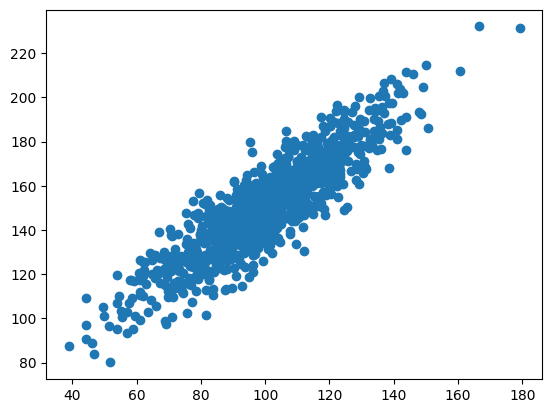

In [97]:
pyplot.scatter(data1, data2)
pyplot.show()

In [98]:
# Correlation matrix between data1 and data2

from numpy import cov

covariance = cov(data1, data2)
print(covariance)

[[385.33297729 389.7545618 ]
 [389.7545618  500.38006058]]


In [99]:
from scipy.stats import pearsonr

# Calculate Pearson's correlation
corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.888


# **Lab Task**

In [100]:
import pandas as pd

data = pd.read_csv('sales_data.csv')
data.head()

,store_id,customer_id,product_id,product_category,date,amount,single_price,transaction_id
0,Store 01,Customer 1508,53642,Toys,4/1/2007 8:09,3,90.246230,1
1,Store 15,Customer 169,90945,Movies,2/15/2005 10:47,2,60.586312,2
2,Store 12,Customer 124,18548,Movies,9/27/2007 5:38,5,96.612695,3
3,Store 05,Customer 1988,85359,Books,5/7/2005 13:19,5,16.962671,4
4,Store 01,Customer 475,80069,Clothing,1/6/2008 17:36,5,65.215310,5


In [101]:
# Calculate Pearson correlation of attributes in sales data

corr, _ = pearsonr(data['amount'], data['single_price'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.125


# **10/12/2024**

In [1]:
import numpy as np
import pandas as pd

In [2]:
dates = pd.read_csv('dates.csv')

In [3]:
dates

,month_day_year,day_month_year,date_time,year_month_day
0,04/22/96,22-Apr-96,Tue Aug 11 09:50:35 1996,2007-06-22
1,04/23/96,23-Apr-96,Tue May 12 19:50:35 2016,2017-01-09
2,05/14/96,14-May-96,Mon Oct 14 09:50:35 2017,1998-04-12
3,05/15/96,15-May-96,Tue Jan 11 09:50:35 2018,2027-07-22
4,05/16/01,16-May-01,Fri Mar 11 07:30:36 2019,1945-11-15
5,05/17/02,17-May-02,Tue Aug 11 09:50:35 2020,1942-06-22
6,05/18/03,18-May-03,Wed Dec 21 09:50:35 2021,1887-06-13
7,05/19/04,19-May-04,Tue Jan 11 09:50:35 2022,1912-01-25
8,05/20/05,20-May-05,Sun Jul 10 19:40:25 2023,2007-06-22


In [6]:
for col in dates:
    print(type(dates[col][3]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'str'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [5]:
dates = pd.read_csv('dates.csv', parse_dates=[0,1,2,3])

C:\Users\junai\AppData\Local\Temp\ipykernel_17144\1239452800.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dates = pd.read_csv('dates.csv', parse_dates=[0,1,2,3])
C:\Users\junai\AppData\Local\Temp\ipykernel_17144\1239452800.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dates = pd.read_csv('dates.csv', parse_dates=[0,1,2,3])


In [60]:
dates['date_time'] = pd.to_datetime(dates['date_time'], format='%a %b %d %H:%M:%S %Y')


In [67]:
column_1 = dates.iloc[:, 0]
pd.DataFrame({'year': column_1.dt.year,
              'month': column_1.dt.month,
              'day': column_1.dt.day,
              'hour': column_1.dt.hour,
              'dayofyear': column_1.dt.dayofyear,
              #'week': column_1.dt.isocalendar().week,
              'weekofyear': column_1.dt.isocalendar().week,
              #'dayofweek': column_1.dt.dayofweek,
              'weekday': column_1.dt.weekday,
              'quarter': column_1.dt.quarter,

})

,year,month,day,hour,dayofyear,weekofyear,weekday,quarter
0,1996,4,22,0,113,17,0,2
1,1996,4,23,0,114,17,1,2
2,1996,5,14,0,135,20,1,2
3,1996,5,15,0,136,20,2,2
4,2001,5,16,0,136,20,2,2
5,2002,5,17,0,137,20,4,2
6,2003,5,18,0,138,20,6,2
7,2004,5,19,0,140,21,2,2
8,2005,5,20,0,140,20,4,2


In [68]:
print(dates.iloc[1,0])
print(dates.iloc[3,0])
print(dates.iloc[3,0]-dates.iloc[1,0])

1996-04-23 00:00:00
1996-05-15 00:00:00
22 days 00:00:00
